<a href="https://colab.research.google.com/github/Fernando21854/DataMining_Stroke_Data/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'


stroke_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')



In [9]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation from data above:

*  Based on the data we can see that the average age is 43 years old

*   Hypertension is relatively low 

*   Average glucose levels is >100 which is considered healthy

*   Heart disease and stroke averages are low, but continously increase based on age






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

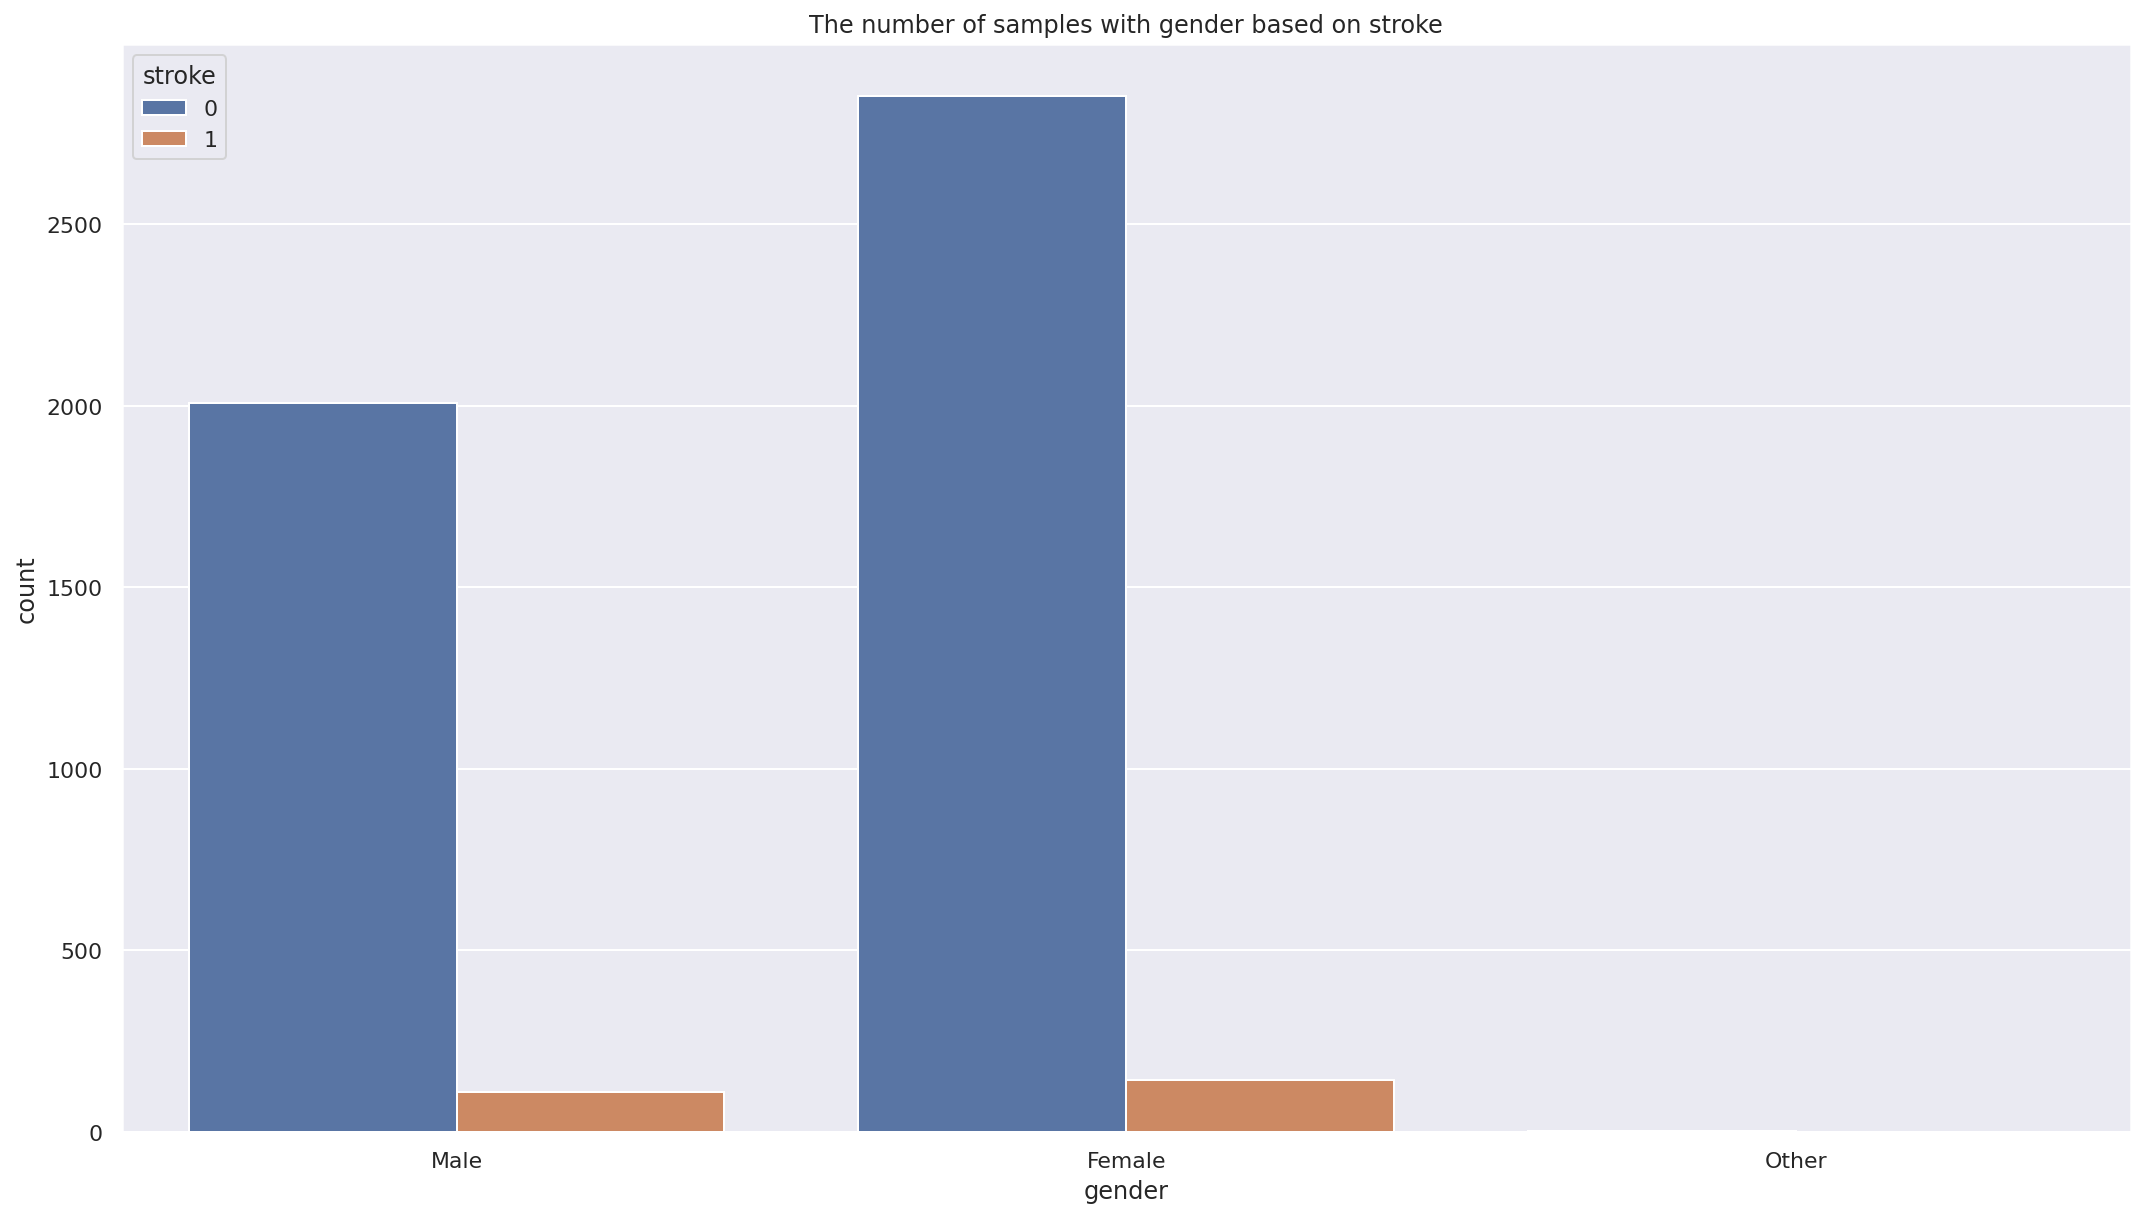

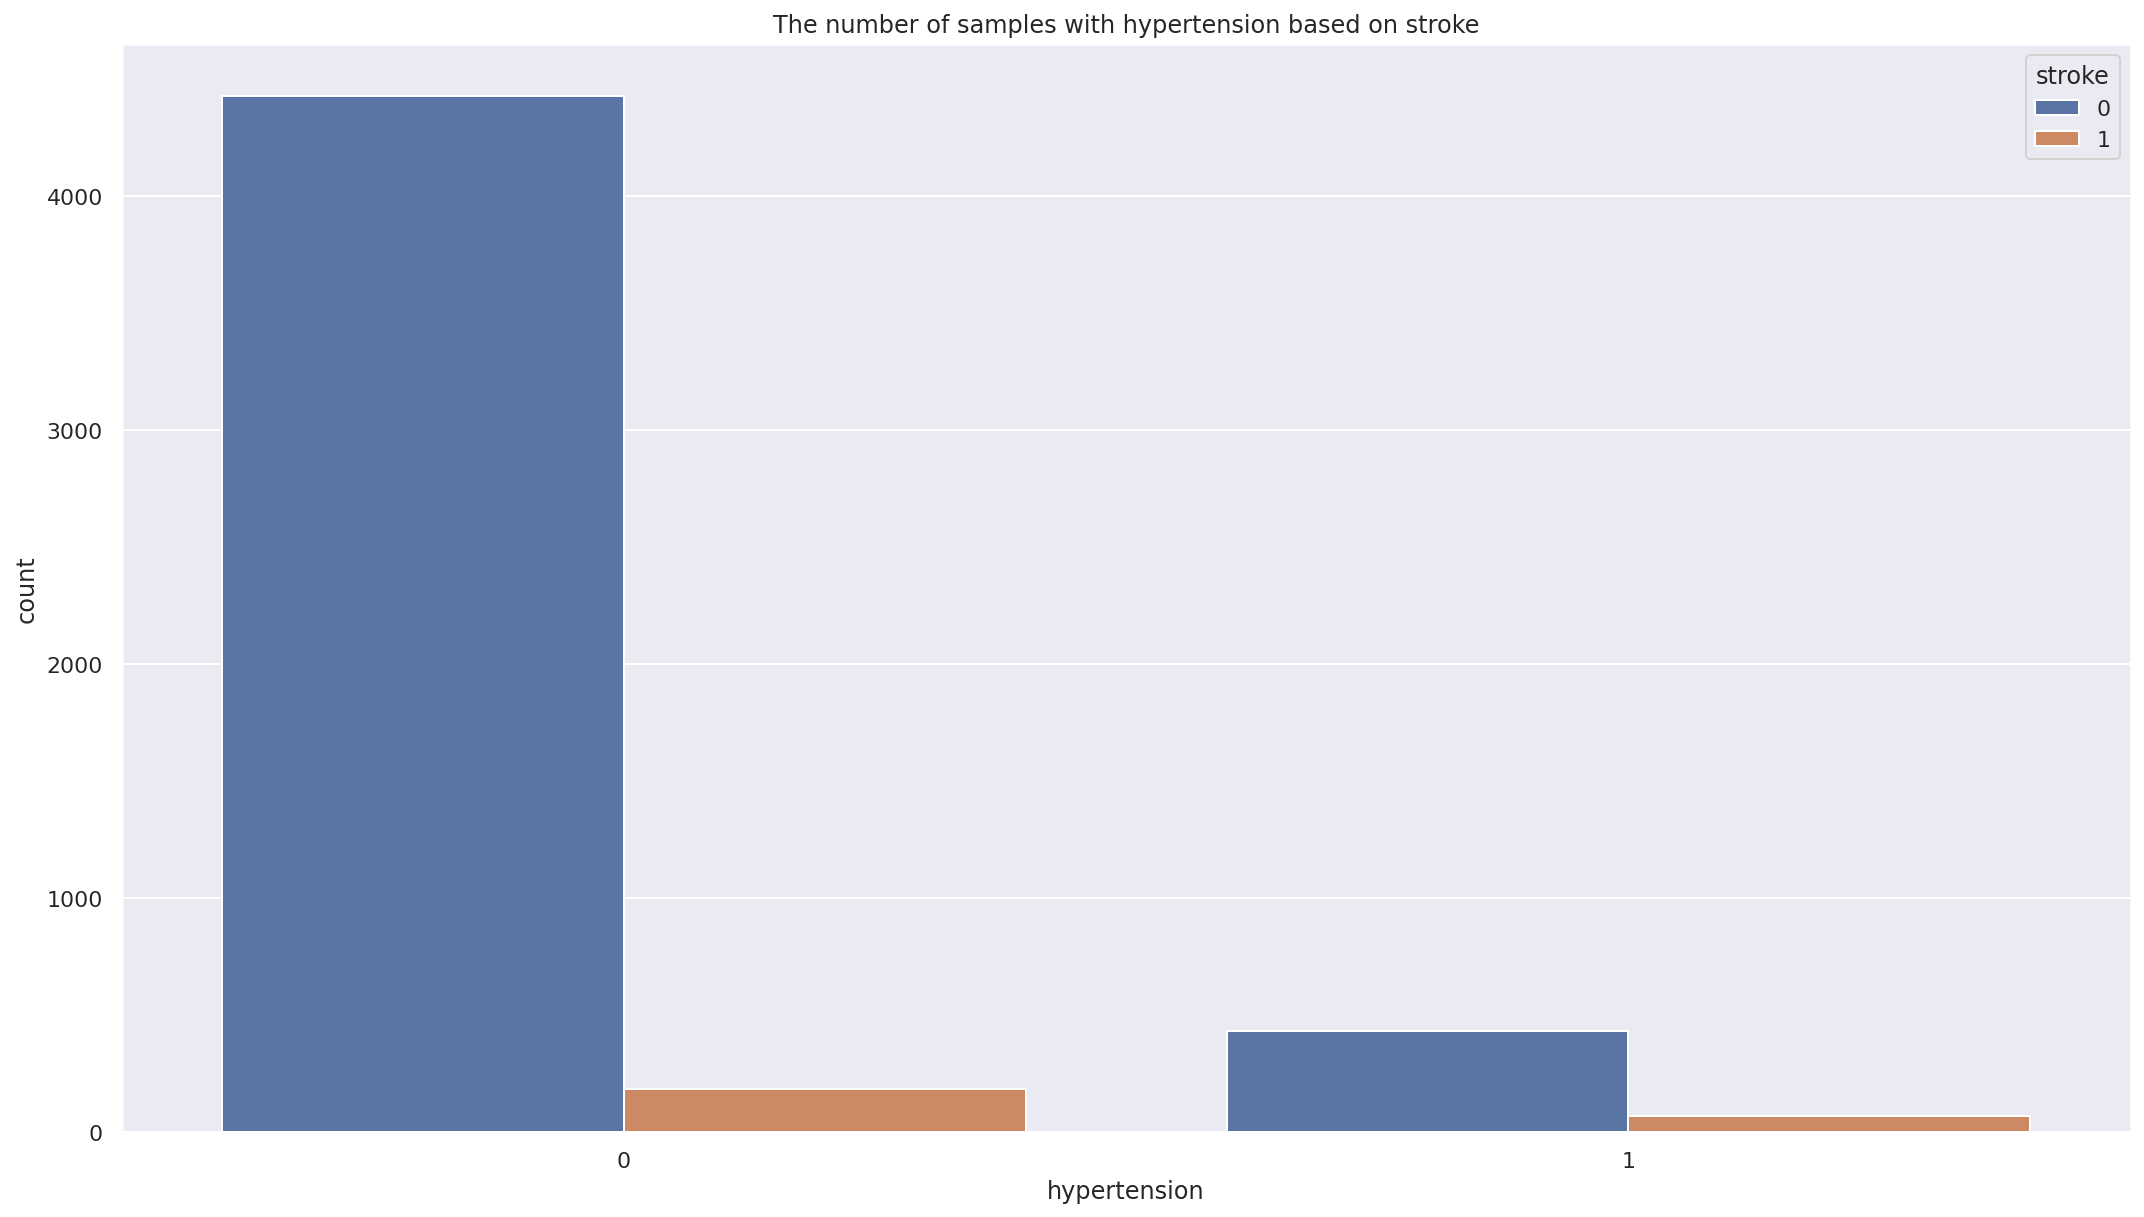

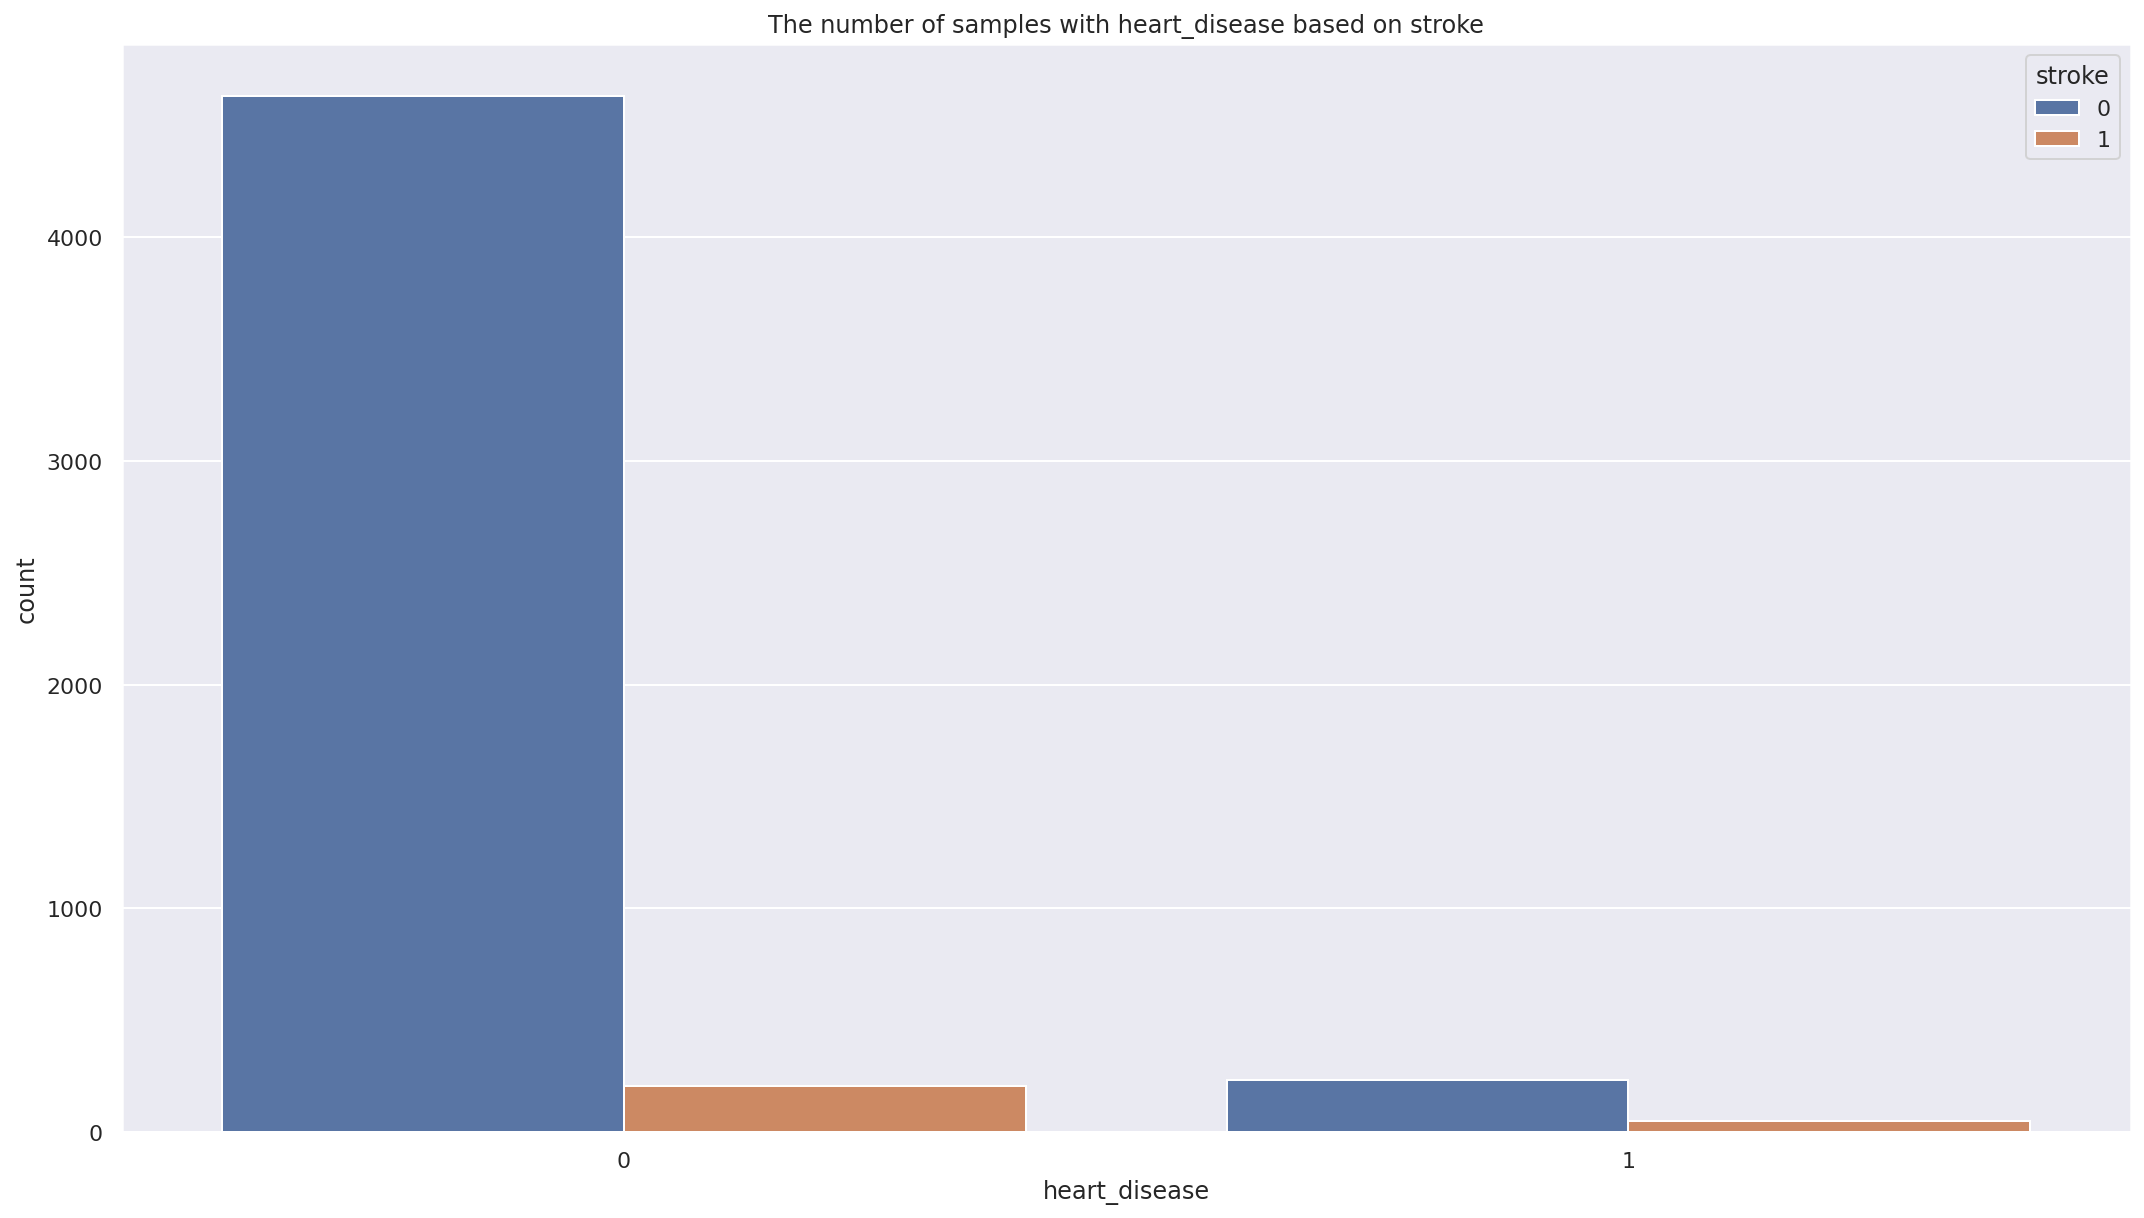

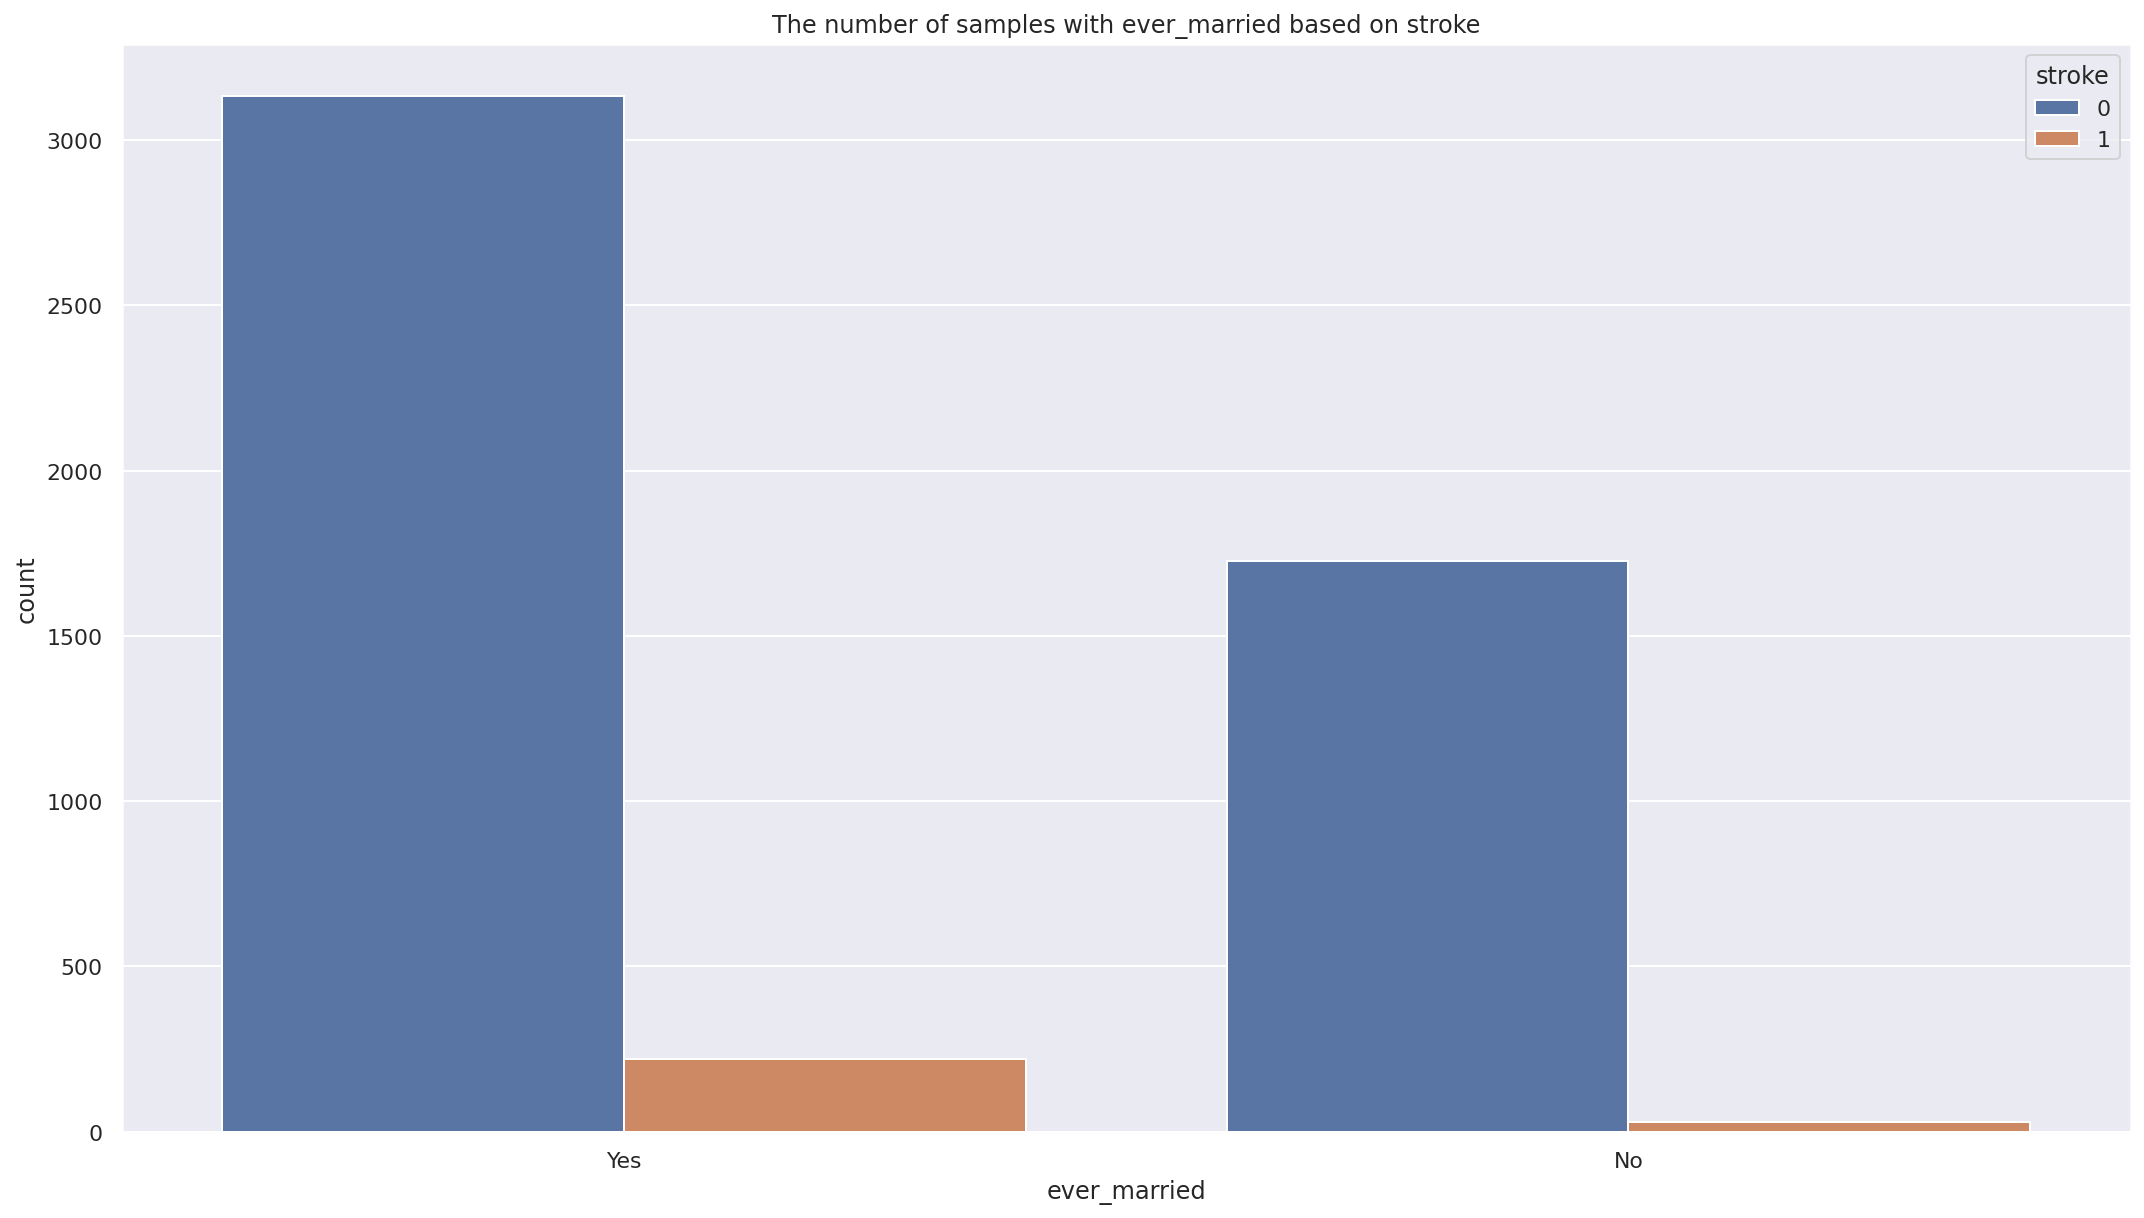

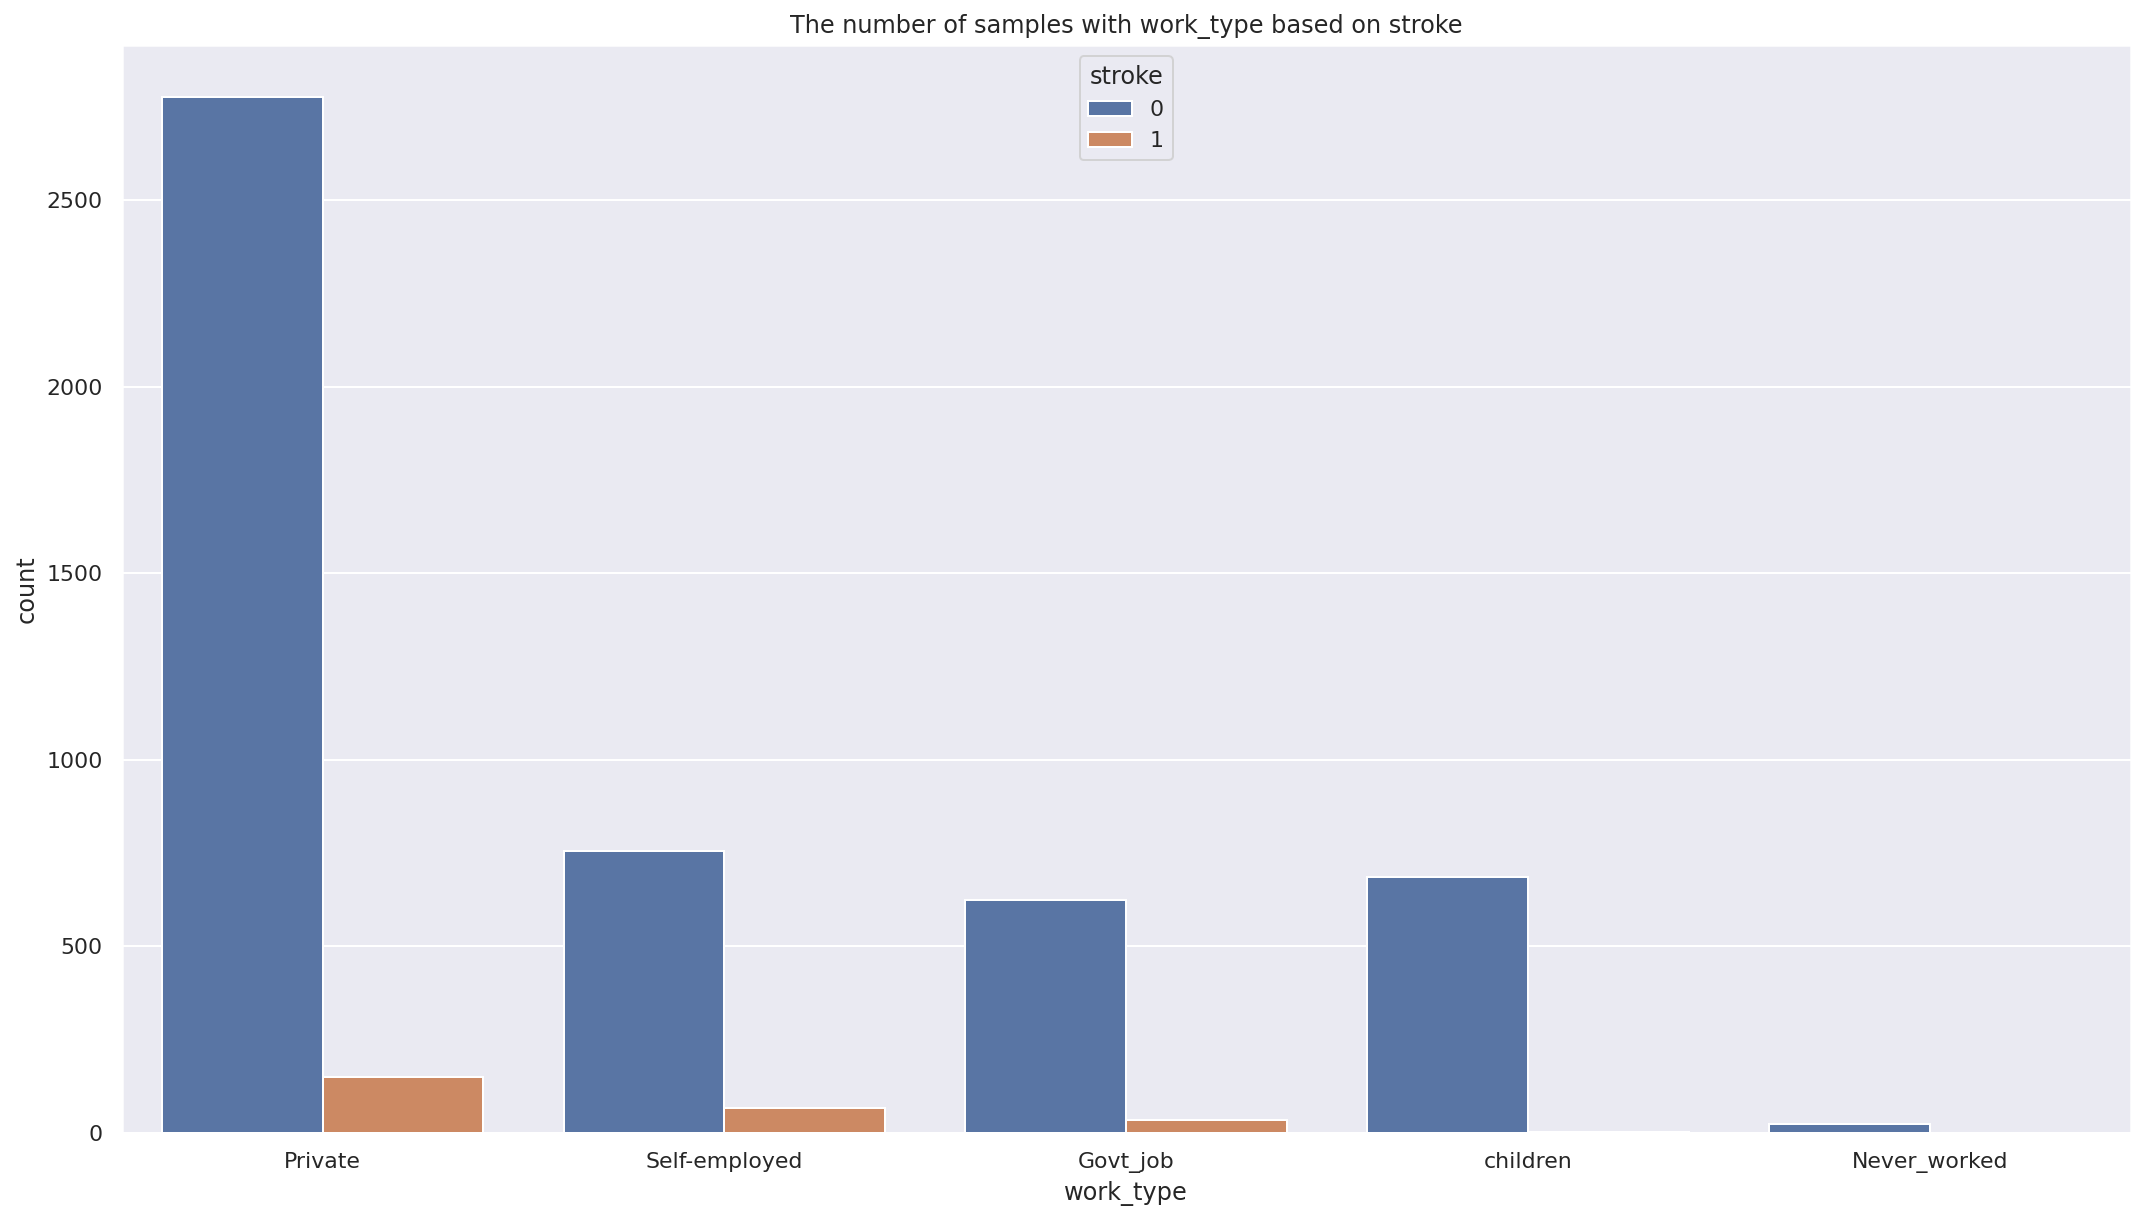

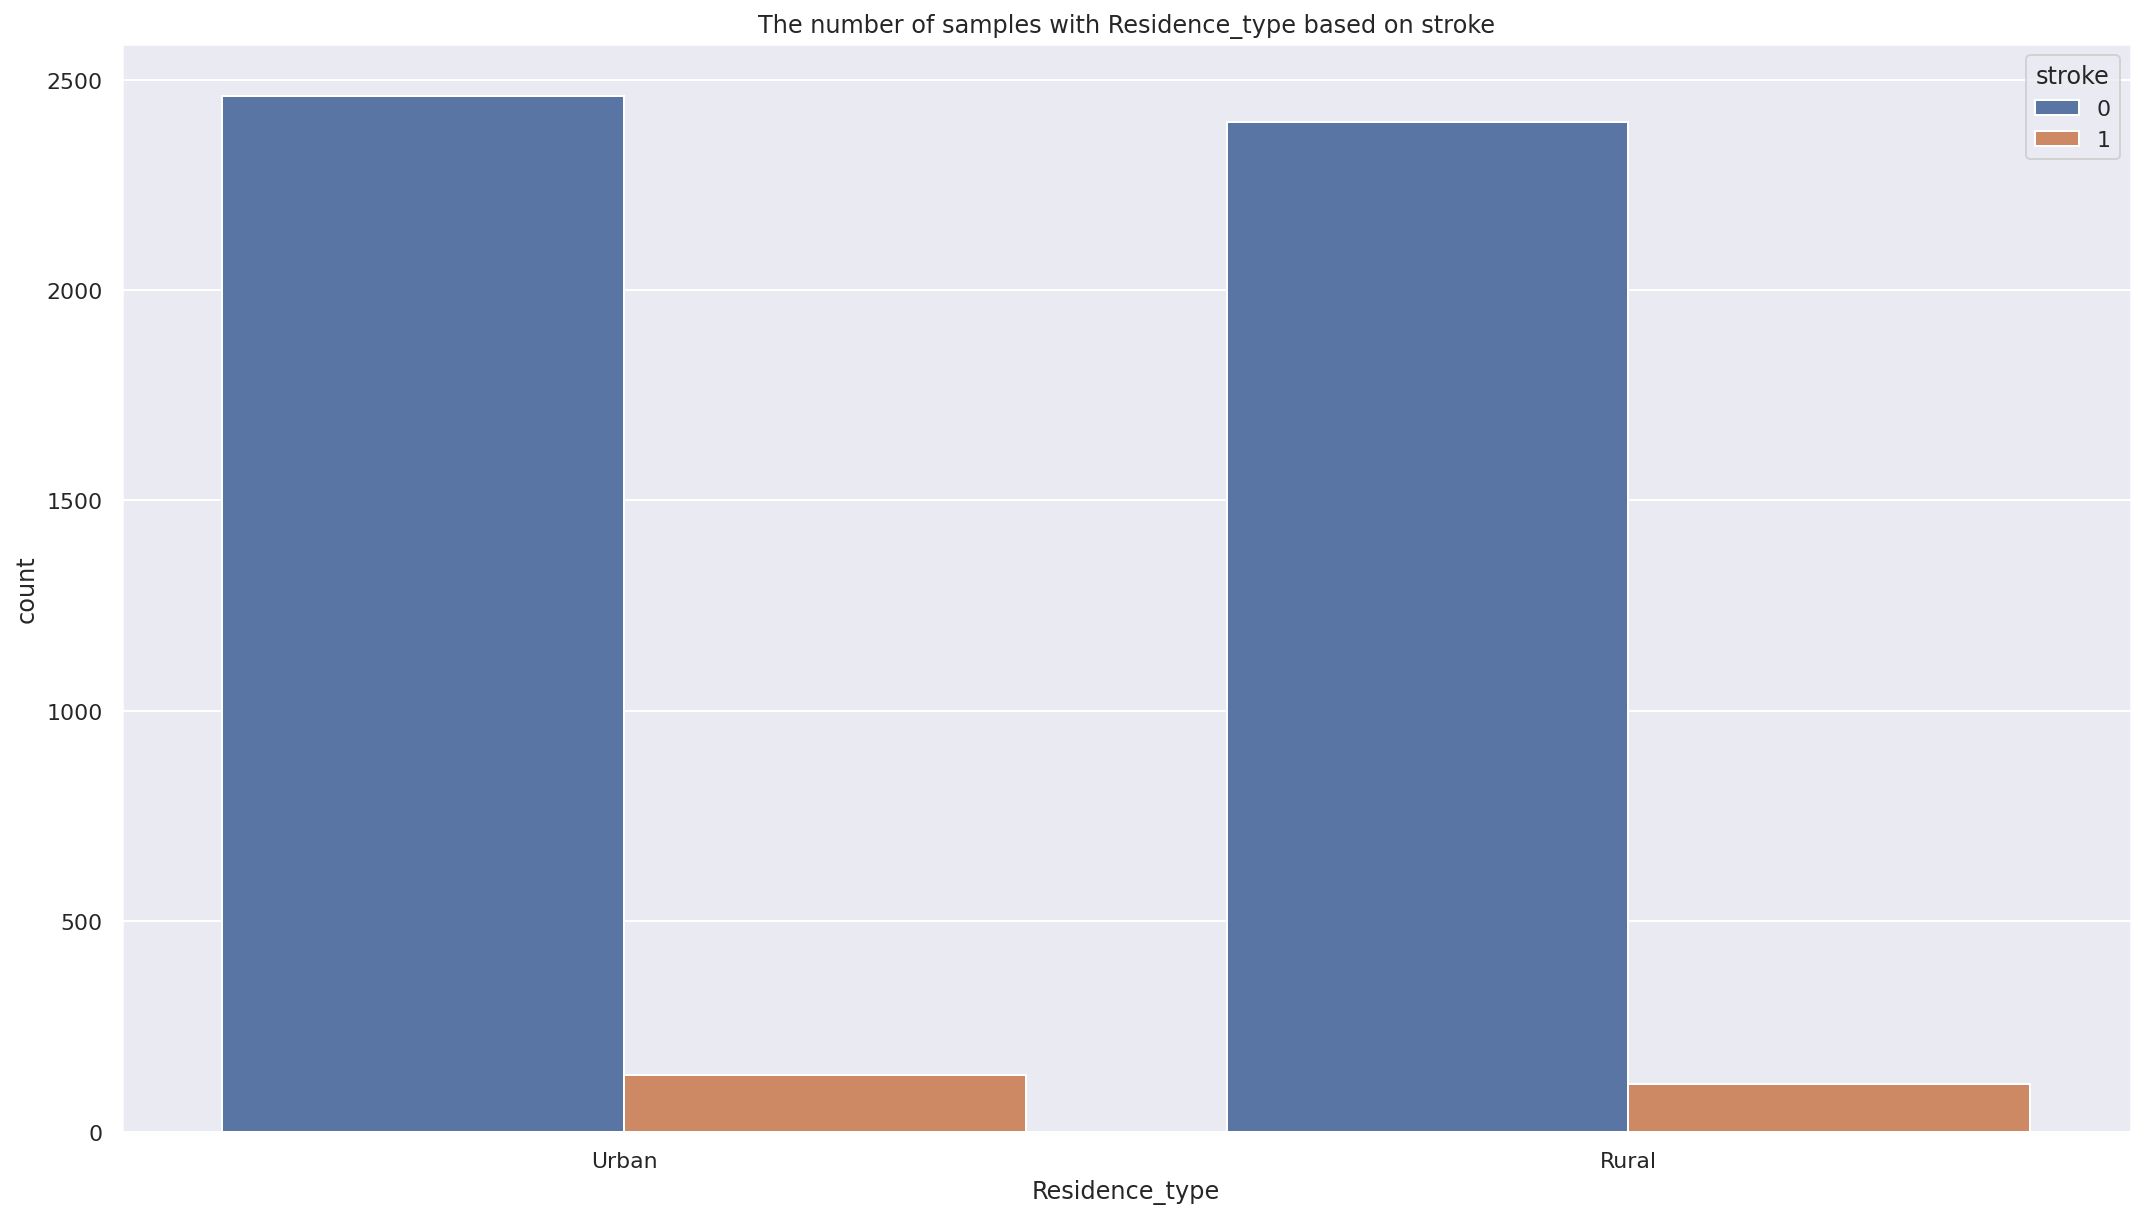

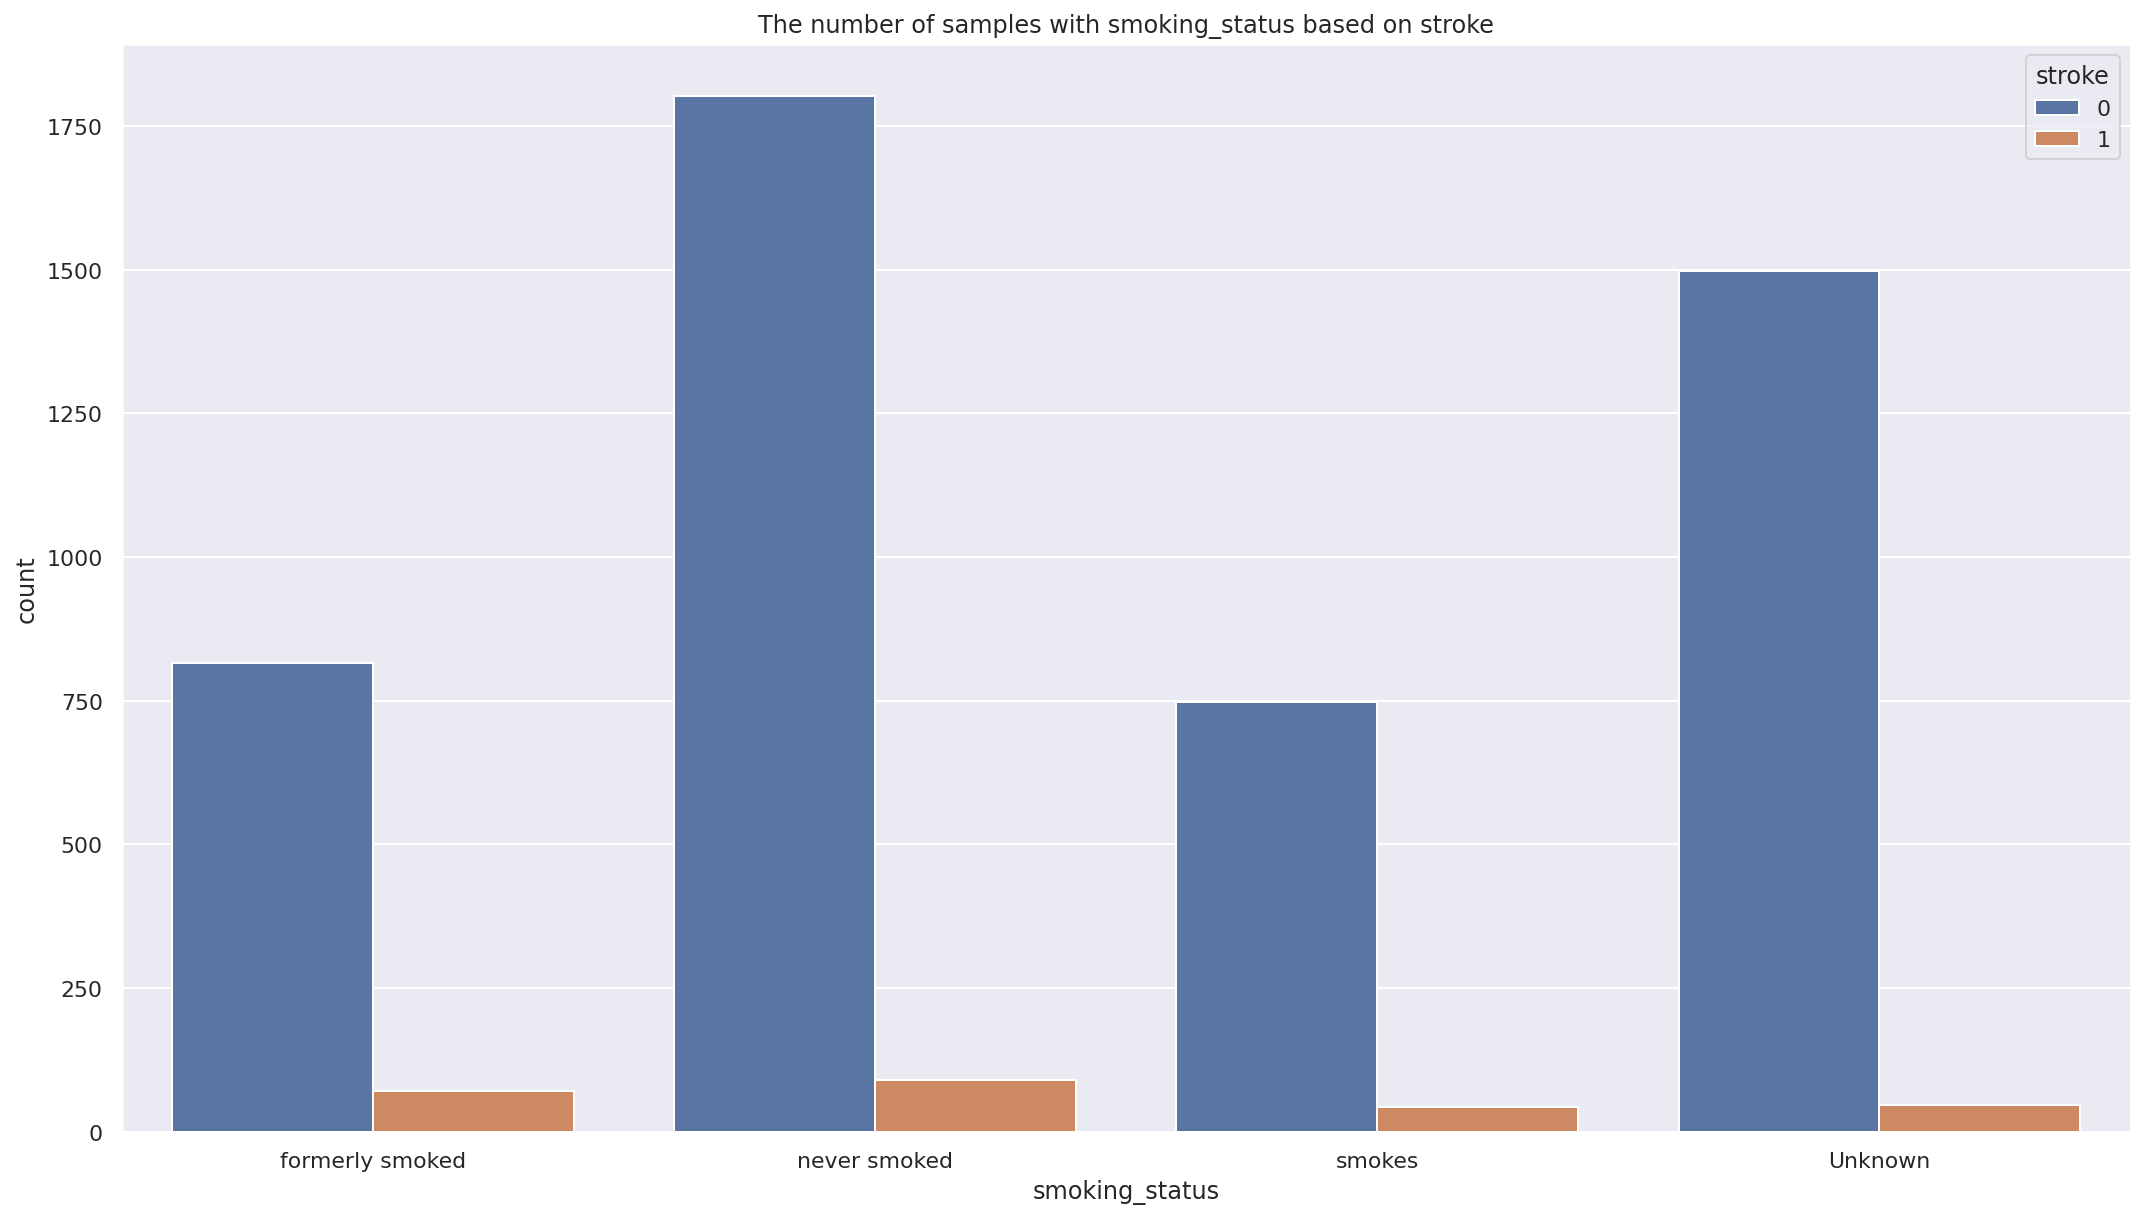

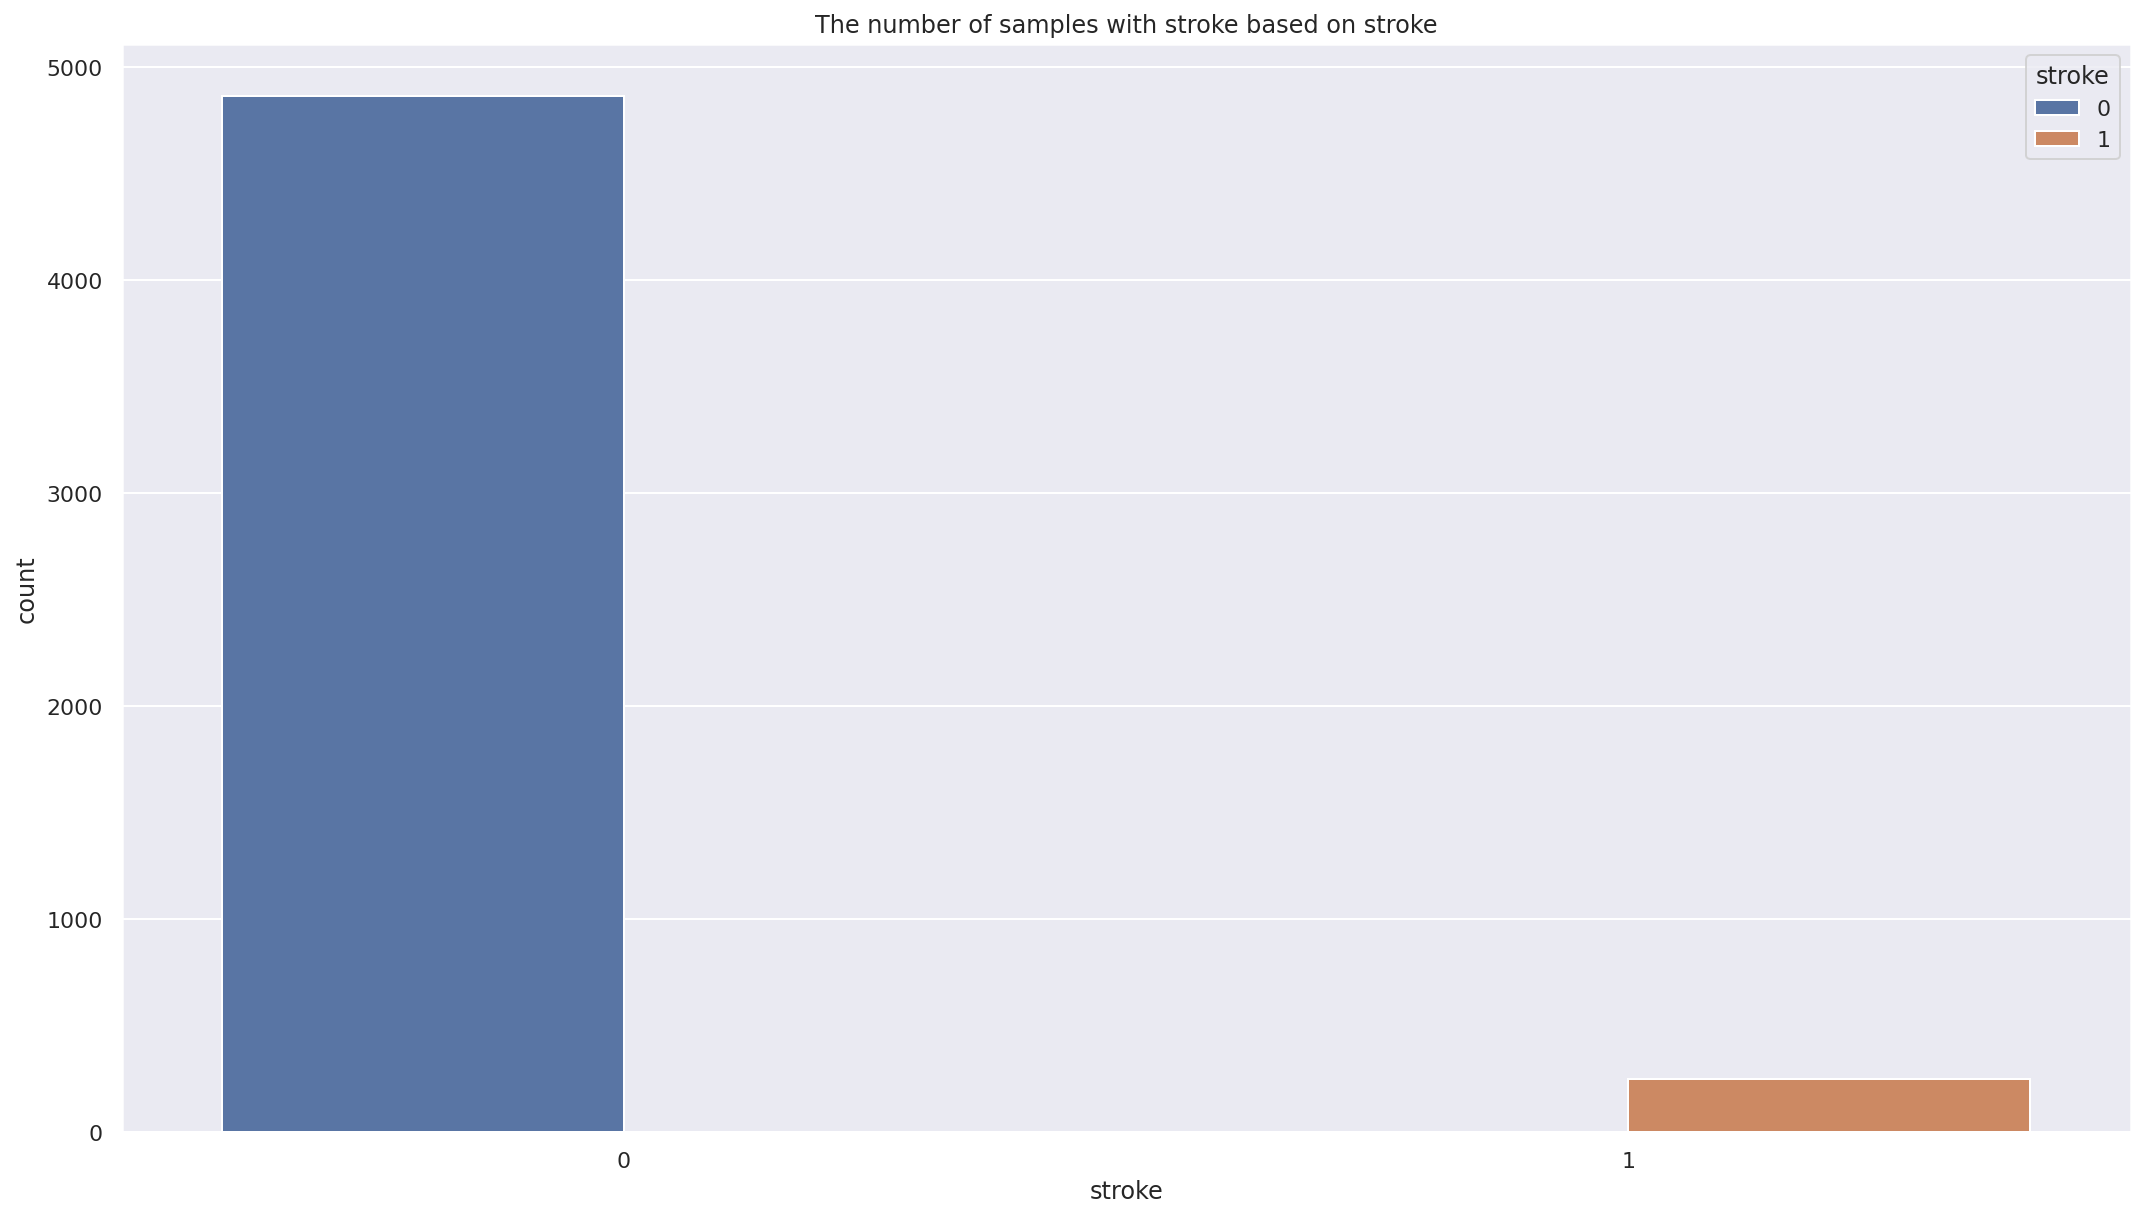

In [23]:
#loop to iterate through each column in the stroke_data 
for i in stroke_data.columns[1:]:
  #checks if data type is either "object" or "int64"
  if ( stroke_data[i].dtype == 'object') or (stroke_data[i].dtype == 'int64'):
    #create a countplot from seaborn library
    sns.countplot(data = stroke_data, x = i,hue='stroke')
    plt.title('The number of samples with {} based on stroke'.format(i))
    #display plot
    plt.show()

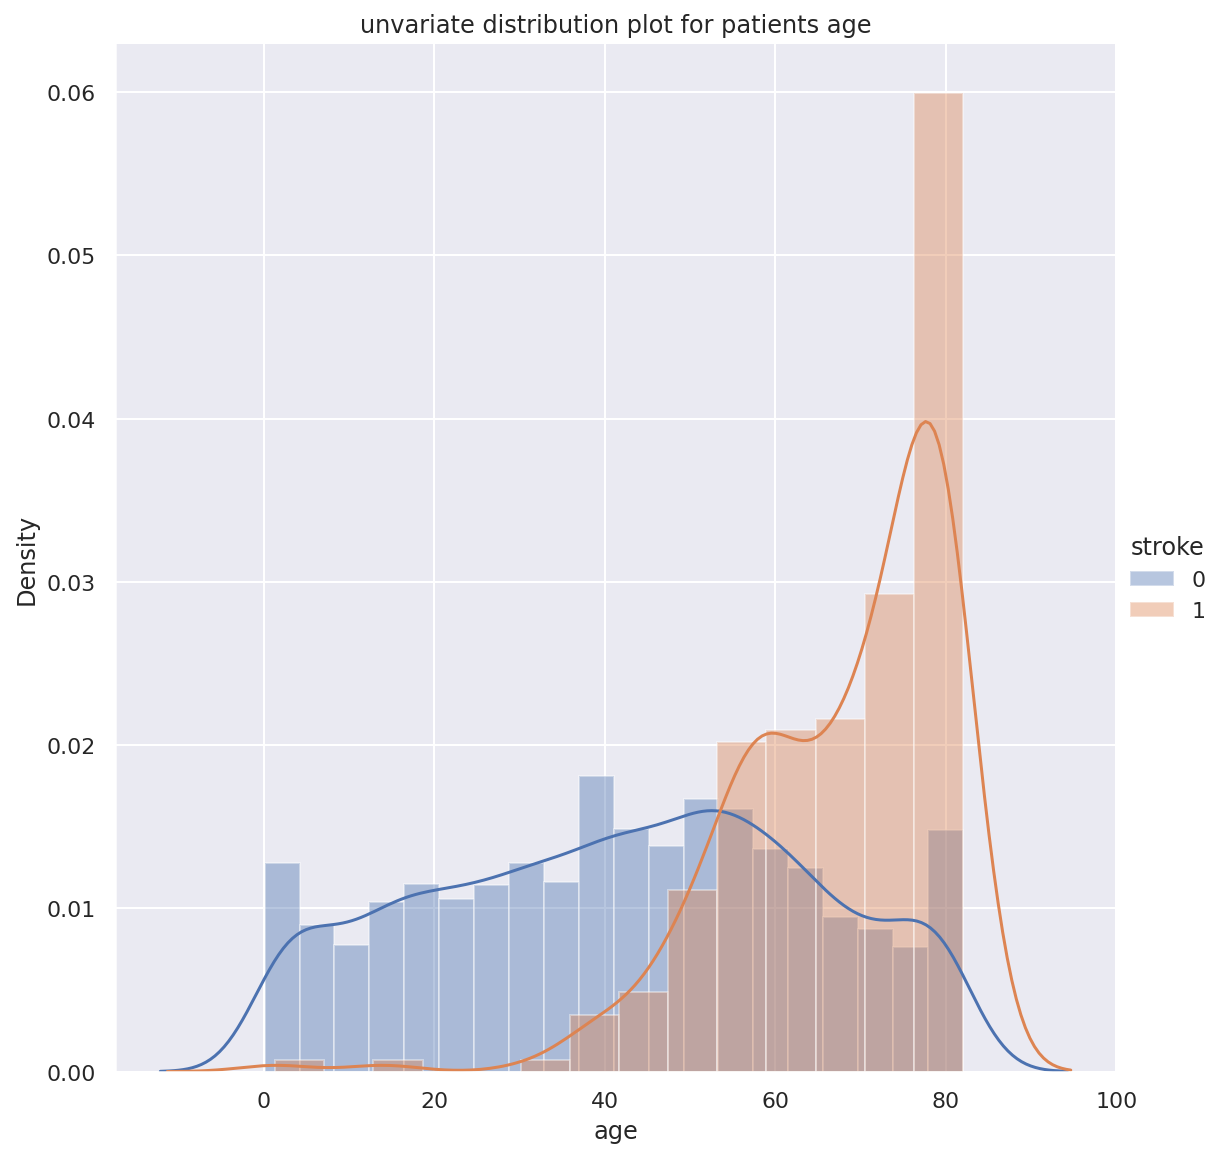

In [27]:
#sets the size of the figure for the plot using "rc params" from "seaborn library" 18,10 is width and height 
sns.set(rc={'figure.figsize':(18,10)})
#FacetGrid object that allows for the creation of multiple plots by categories and set height
#.map makes a histogram of the distribution of values in the age column and the add_legend shows the categories 
sns.FacetGrid(stroke_data, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
#sets the title of the plot to "univariate distribution plot for patients age
plt.title("unvariate distribution plot for patients age")
#display plot ***DONT FORGET PARENTHESES***
plt.show()

From the distribution plot we can see that the higher the age the higher chance they have of having a stroke. At around age 80 it is peak age of having a stroke. 


Text(0, 0.5, 'AGE')

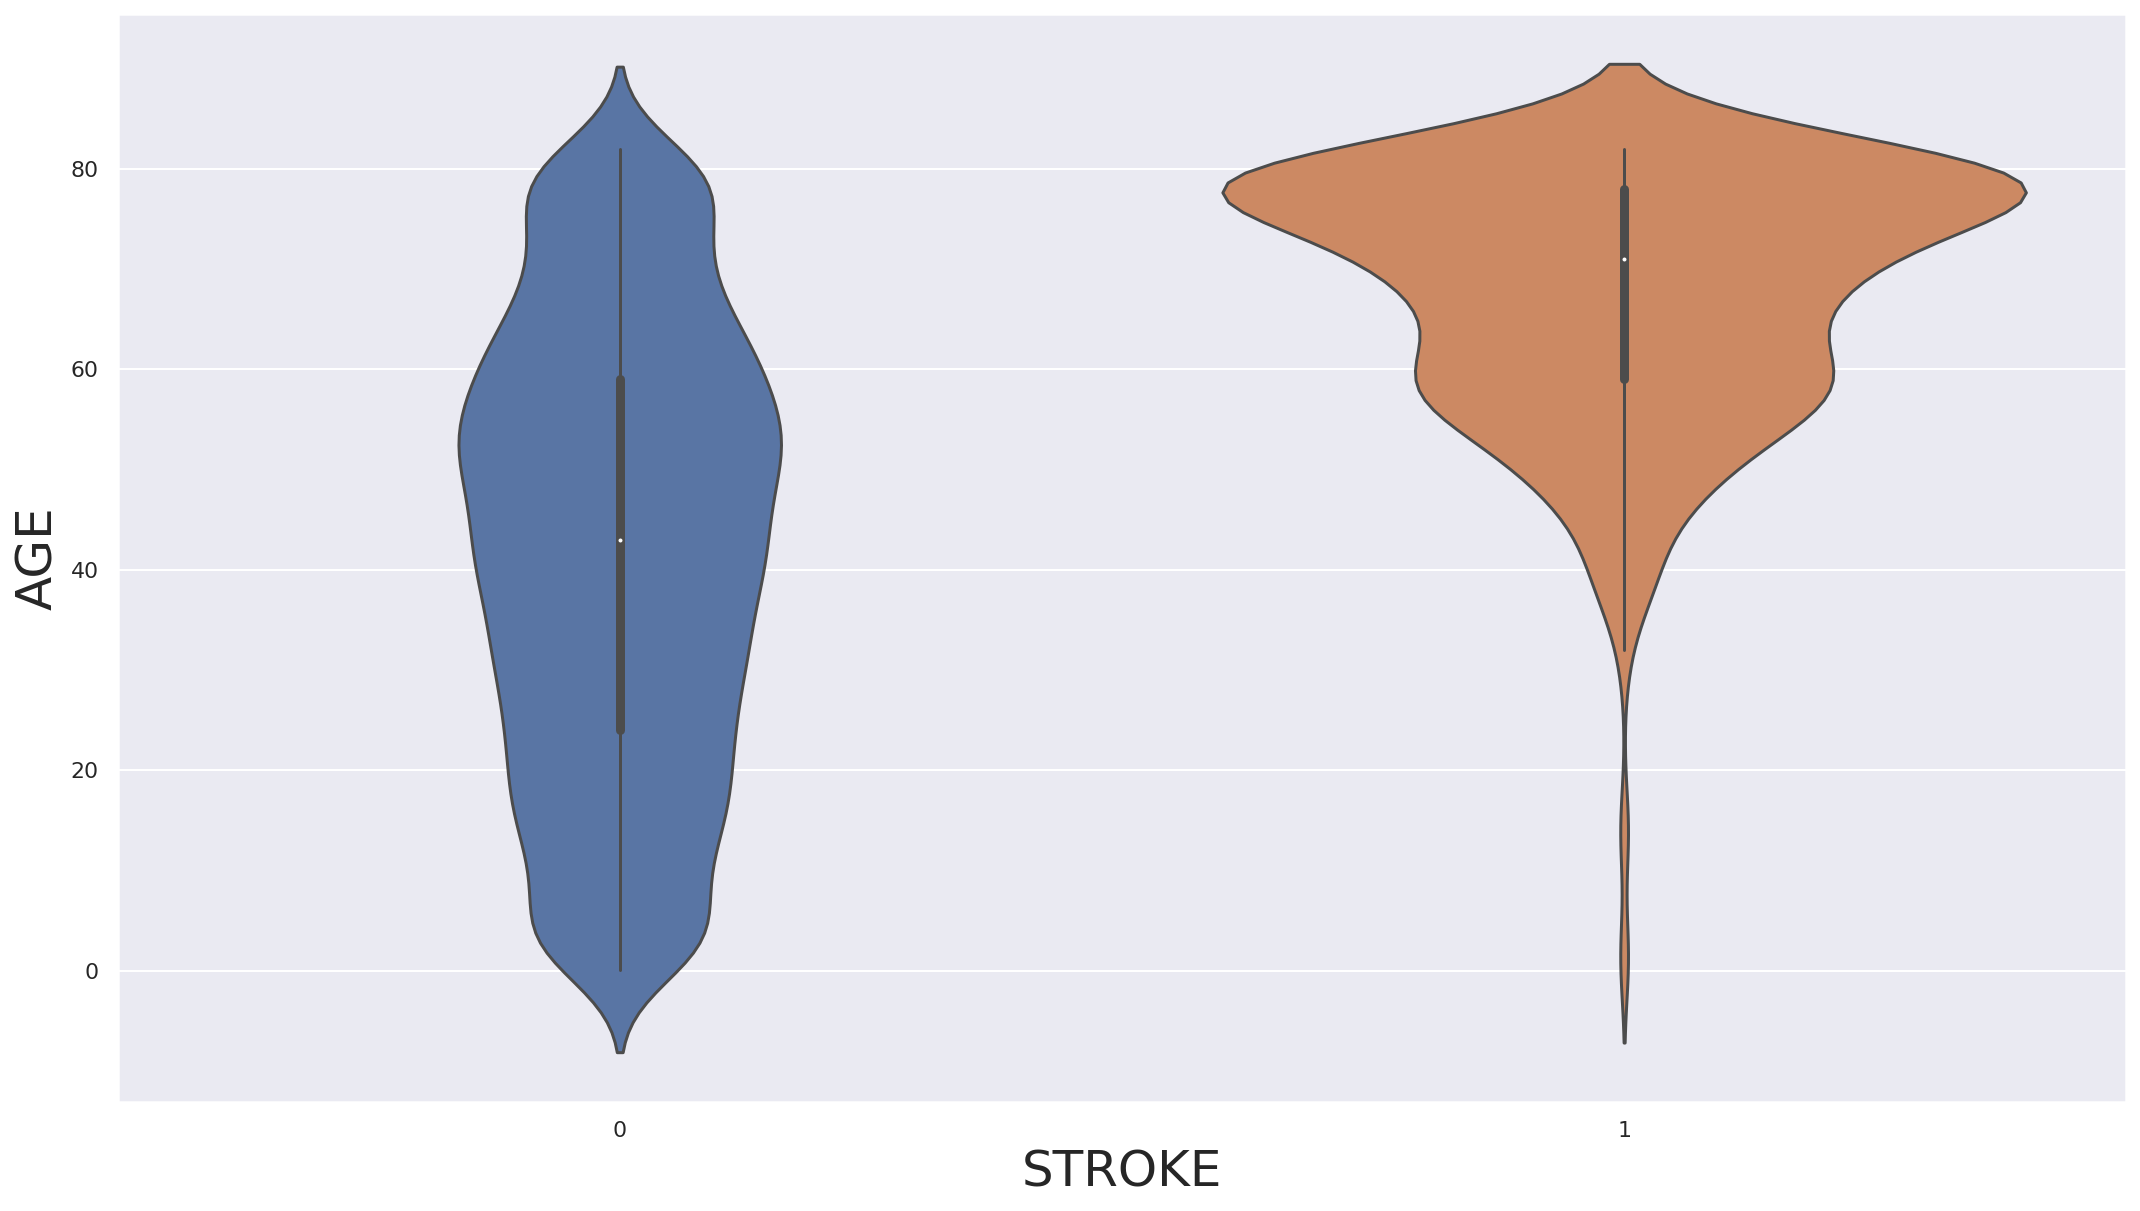

In [45]:
#set size of figure
sns.set(rc={'figure.figsize':(18,10)})
#use sns.violinplot with data and x and y 
seaborn_plot = sns.violinplot(data = stroke_data, x = "stroke", y = "age" )
#change label font size for better looking data
seaborn_plot.set_xlabel("STROKE", fontsize = 25)
seaborn_plot.set_ylabel("AGE", fontsize = 25)



According to this violin plot the likelihood of getting a stroke is around 75 to around 80 since it shows the highest.

**Is this dataset imbalanced?**
Yes, the data set is imbalanced because in our stroke data there is less percentage of people that get strokes between the rest of our categories. Due to having low numbers of people getting strokes we get an imbalanced data set.

Text(0.5, 1.0, 'Correlation HeatMap')

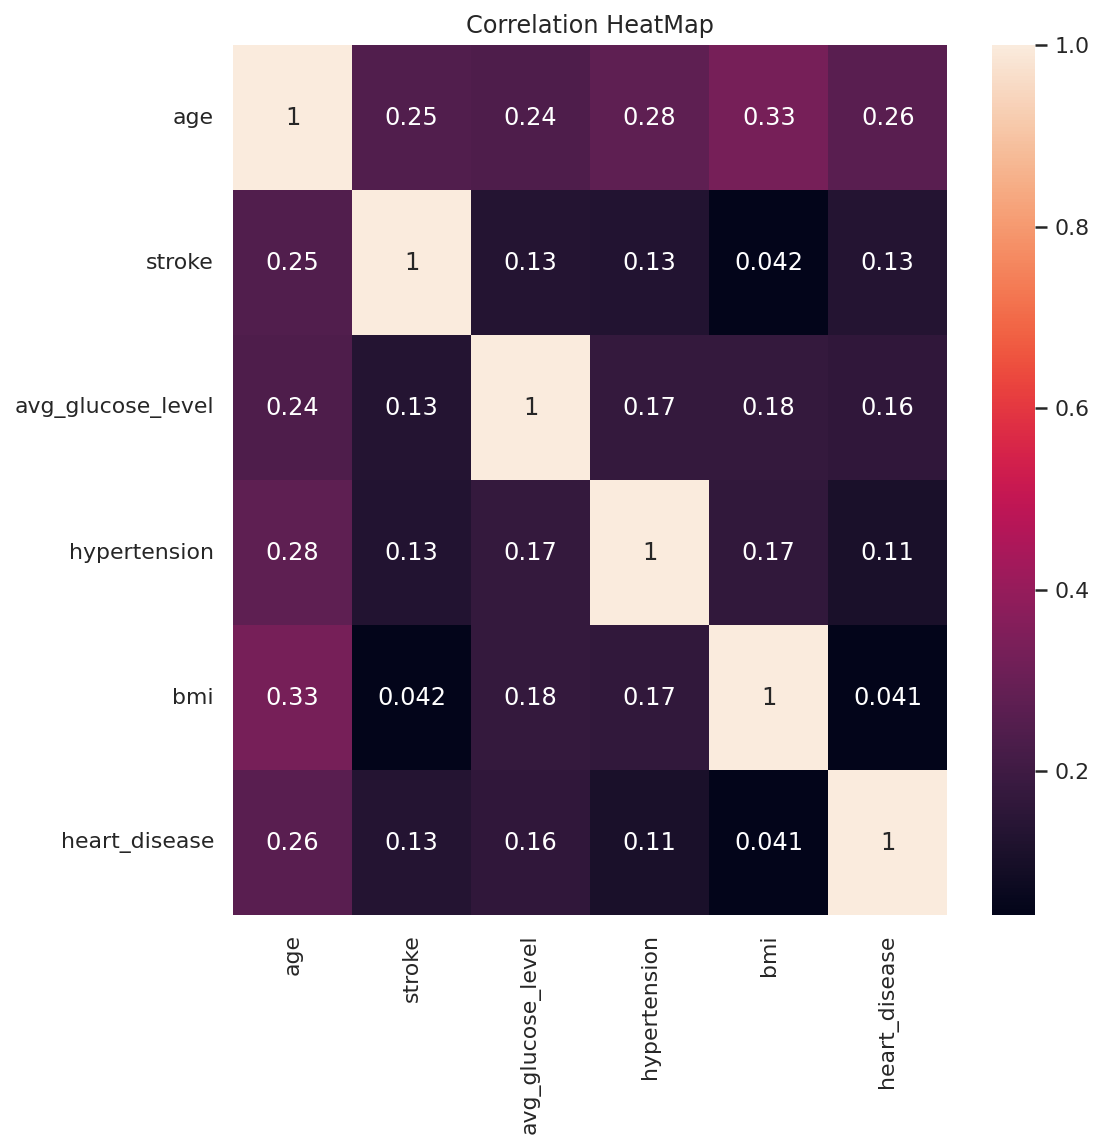

In [51]:
# use ax variable to assign the subplot object, then set width and height
fig, ax = plt.subplots(figsize=(8,8))
#use sns.heatmap to show a visualization of our data and get the correlation matrix between the columns
heatmap = sns.heatmap(stroke_data[["age", "stroke", "avg_glucose_level", "hypertension", "bmi", "heart_disease"]].corr(), vmax= 1, annot=True)
heatmap.set_title("Correlation HeatMap")

In [52]:
#see correlation of data for better understanding
stroke_data[1:].corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003806,0.003467,-0.000233,0.001782,0.003352,0.007527
age,0.003806,1.000000,0.276498,0.263415,0.237810,0.333256,0.244843
hypertension,0.003467,0.276498,1.000000,0.108763,0.174775,0.167892,0.128435
heart_disease,-0.000233,0.263415,0.108763,1.000000,0.160030,0.040565,0.131772
avg_glucose_level,0.001782,0.237810,0.174775,0.160030,1.000000,0.175102,0.129946
bmi,0.003352,0.333256,0.167892,0.040565,0.175102,1.000000,0.041525
stroke,0.007527,0.244843,0.128435,0.131772,0.129946,0.041525,1.000000


After closely observing the data we can see that there is a very strong correlation on the ages, glucose level, heart disease, and the bmi because they are closer to 1. The most obvious one is bmi and age that show a very strong correlation which we can see on the heatmap above. 

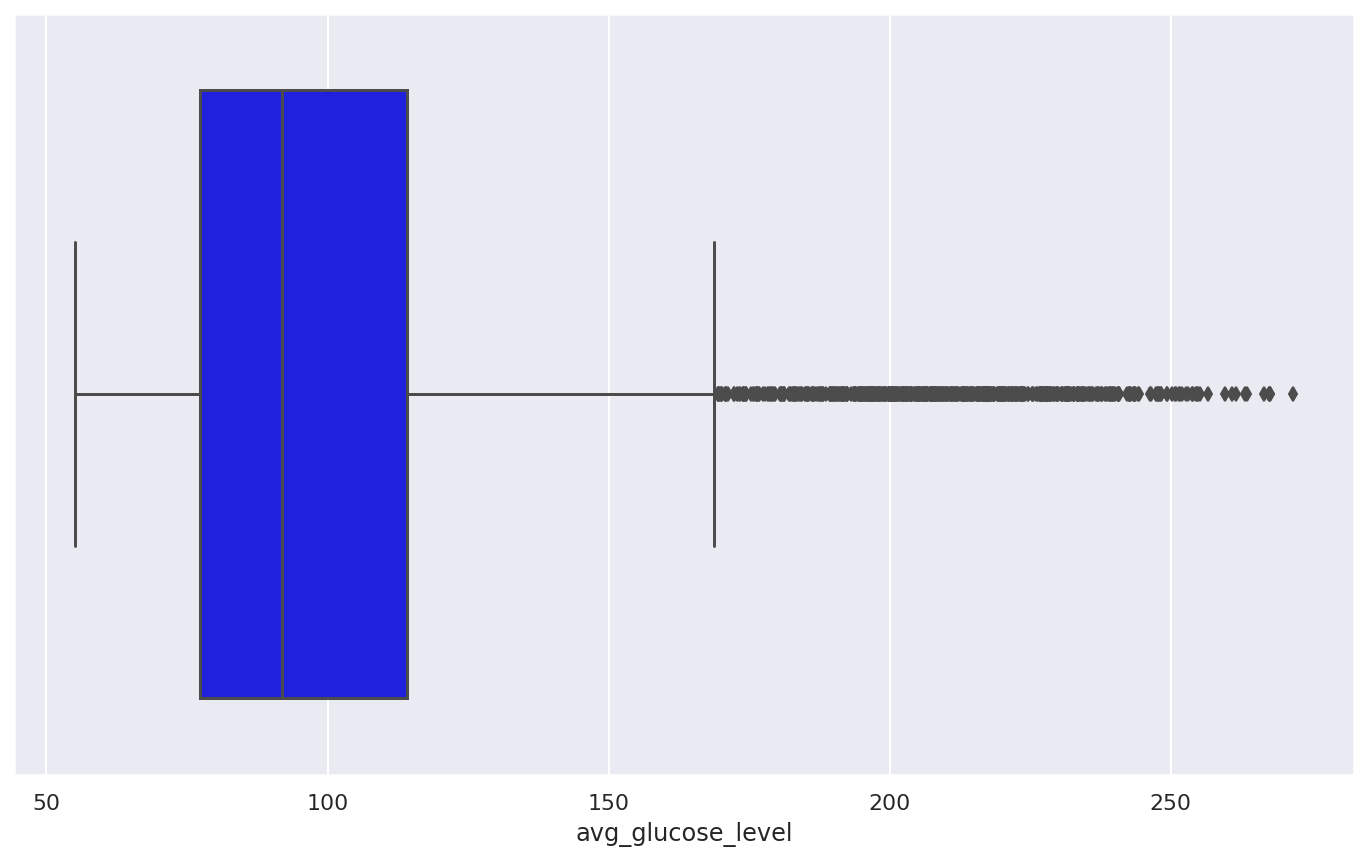

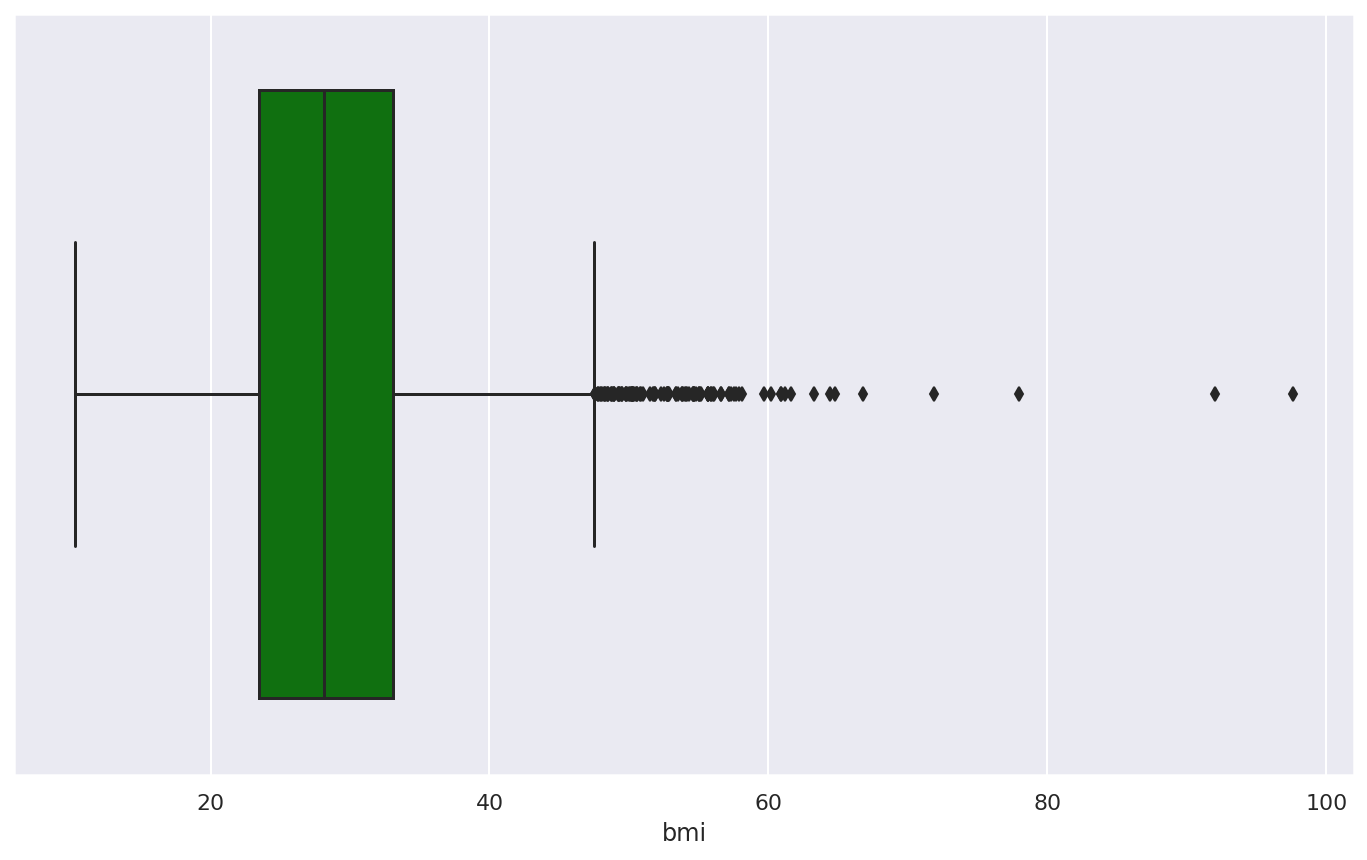

In [64]:
plt.figure(figsize = (12,7))
sns.boxplot(data=stroke_data, x = stroke_data["avg_glucose_level"], color="blue")


plt.figure(figsize = (12,7))
sns.boxplot(data = stroke_data, x = stroke_data["bmi"], color = "green")

In [69]:
avg_glucose_level = stroke_data.loc[stroke_data["avg_glucose_level"] > 160]
bmi_outliers = stroke_data.loc[stroke_data["bmi"] >50]



